<a href="https://colab.research.google.com/github/baharzurnaci/PythonKodlarim/blob/master/Proje_German_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 1- VERİ KÜMESİ ve KÜTÜPHANELERİN YÜKLENMESİ

In [0]:
! pwd 

/content


In [0]:
! ls

sample_data


In [0]:
#mount: google drive ve colab bağlantısı

from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
% cd '/content/drive/My Drive/' 


/content/drive/My Drive


In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as plt 
import matplotlib.pyplot as plt 
import seaborn as sns

import os


In [0]:
data = pd.read_csv("german_credit_data.csv",index_col=0)


In [0]:
data.head(10) # Veri kümesi tablosunun ilk 10 öznitelik bilgisini verir.

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


In [0]:
data.tail() # Veri kümesi tablosunun son 5 bilgisini verir.

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV
999,27,male,2,own,moderate,moderate,4576,45,car


In [0]:
data.describe() # Veri kümesine ait string olmayan nümerik değeleri gösterir.

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [0]:
data.info() # Veri kümesi ile ilgili bellek kullanımı ve veri istatistikleri

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [0]:
data.corr() # Veri kümesinde bulunan öznitelikler arasında ki ilişkiyi değerlendirir. Duration ve Credit amount arasında 62% ilişki var

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


In [0]:
data.shape # Veri kümesinin kaç satır ve sütundan oluştuğu bilgisini verir. Shape bir özelliktir ve metod olmadığı için parantez kullanılmamıştır.

(1000, 9)

In [0]:
data.columns # Veri kümesine ait sütunlarımızı gösterir.

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [0]:
print(data.nunique()) # Benzersiz türleri bulabiliriz.

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


In [0]:
data.sample(5) # Veri kümesi içerisinde eksik veri olup olmadığını ilk 5 satır özetine bakarak tespit edebiliriz.


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
993,30,male,3,own,little,little,3959,36,furniture/equipment
581,49,male,1,own,little,moderate,3124,12,car
832,29,male,2,rent,little,little,11816,45,business
676,33,male,2,own,little,NaN,5150,24,furniture/equipment
912,25,female,2,own,NaN,moderate,2991,30,radio/TV


In [0]:
pd.concat([data.isnull().sum(), 100 * data.isnull().sum()/len(data)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})  
# Veri kümesinde ki eksik veri sayılarını ve oranlarını gösterir.

,Missing Records,Percentage (%)
Age,0,0.0
Sex,0,0.0
Job,0,0.0
Housing,0,0.0
Saving accounts,183,18.3
Checking account,394,39.4
Credit amount,0,0.0
Duration,0,0.0
Purpose,0,0.0


In [0]:

data["Saving accounts"].value_counts(dropna = False)
# Saving accounts değişkeni için her farklı değerden kaç tane olduğunu hesaplar.
# dropna = False; Eğer NaN değer var ise göster anlamına gelir.

little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [0]:
data["Checking account"].value_counts(dropna = False) 

NaN         394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [0]:
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True) 
# Kategorik değişkenlerimizi mode yöntemiyle doldurabiliriz.

In [0]:
data.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


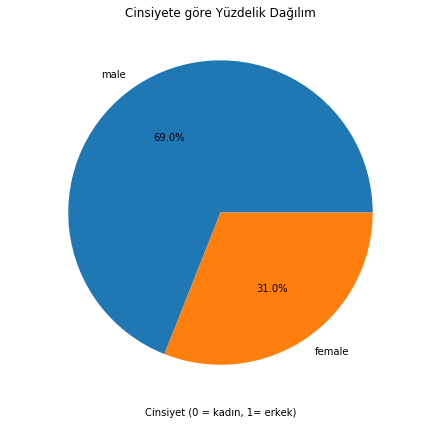

In [0]:

# 2- VERİ GÖRSELLEŞTİRME 

fig = plt.figure(figsize=(7,7))   # Veri kümesinde ki cinsiyet dağılımı
data['Sex'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.xlabel("Cinsiyet (0 = kadın, 1= erkek)")
plt.ylabel(" ", fontsize = 20)
plt.title("Cinsiyete göre Yüzdelik Dağılım")
print("")   # 690 Erkek, 310 Kadın

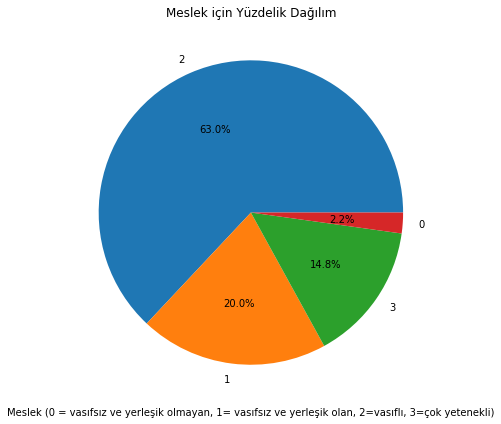

In [0]:
fig = plt.figure(figsize=(7,7))   # Veri kümesinde ki meslek dağılımı
data['Job'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.xlabel("Meslek (0 = vasıfsız ve yerleşik olmayan, 1= vasıfsız ve yerleşik olan, 2=vasıflı, 3=çok yetenekli)")
plt.ylabel(" ", fontsize = 20)
plt.title("Meslek için Yüzdelik Dağılım")
print("")  # 148 Çok yetenekli, 630 Vasıflı, 200 Vasıfsız ve yerleşik olan, 22 Vasıfsız ve yerleşik olmayan

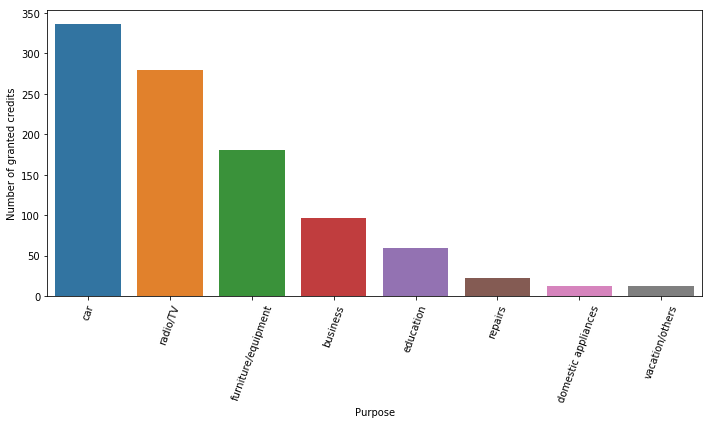

In [0]:
n_credits = data.groupby("Purpose")["Age"].count().rename("Count").reset_index()  # Verilen kredilerin hangi amaçla alındığını gösterir.
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=70)
plt.ylabel("Number of granted credits")
plt.tight_layout()

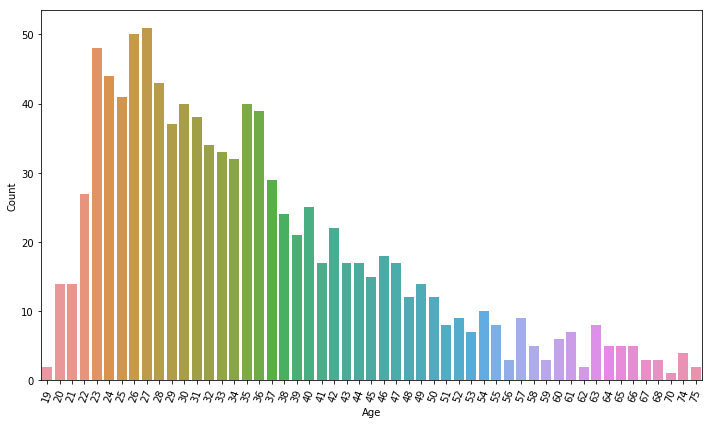

In [0]:
n_credits = data.groupby("Age")["Purpose"].count().rename("Count").reset_index()  # Verilen kredilerin miktarını gösterir.
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Age",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=70)
plt.tight_layout()

In [0]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(15,7))
    box = sns.boxplot(x=x,y=y, hue=h, data=data)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

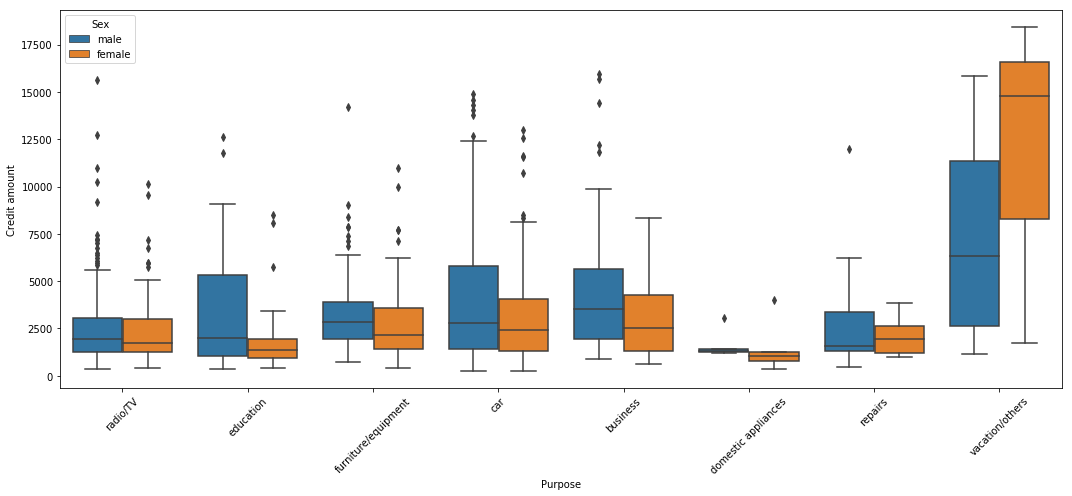

In [0]:
boxes("Purpose","Credit amount","Sex")

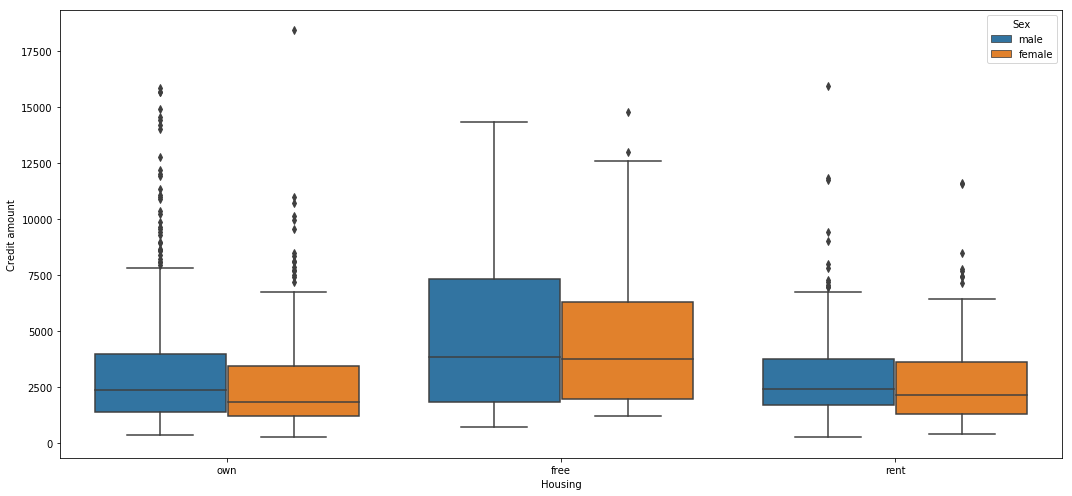

In [0]:

boxes("Housing","Credit amount","Sex",r=0)

In [0]:
data.rename(columns = {'Saving accounts': 'Saving_accounts'}, inplace=True)
data.rename(columns = {'Checking account': 'Checking_account'}, inplace=True)
data.rename(columns = {'Credit amount': 'Credit_amount'}, inplace=True)

In [0]:
data.head(5)

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [0]:
print("Sex' : ",data['Sex'].unique())
print("Housing : ",data['Housing'].unique())
print("Saving_accounts : ",data['Saving_accounts'].unique())
print("Checking_account : ",data['Checking_account'].unique())
print("Purpose : ",data['Purpose'].unique())

Sex' :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving_accounts :  ['little' 'quite rich' 'rich' 'moderate']
Checking_account :  ['little' 'moderate' 'rich']
Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [0]:
# Kategorik Değişkenlerin Dönüştürülmesi

from sklearn import preprocessing   # LabelEncoder için gerekli işlemlerin yapılması
le = preprocessing.LabelEncoder()   # Kategorik sütunları nümerik değerlere dönüştürür
 
data['Sex'] = le.fit_transform(data['Sex'])
data['Housing'] = le.fit_transform(data['Housing'])
data['Saving_accounts'] = le.fit_transform(data['Saving_accounts'])
data['Checking_account'] = le.fit_transform(data['Checking_account'])
data['Purpose'] = le.fit_transform(data['Purpose'])

data.head(5)  # Veri kümemizin nümerik halini görebiliriz.

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


In [0]:
# 3- KÜTÜPHANELERİN YÜKLENMESİ VE MODELİN UYGULANMASI 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


In [0]:
# Modelleri uygulamadan önce veri kümemizi train ve test olarak ayırıyoruz.
# Train: kullanılan veriler, Test: Eğitim için kullanılmayan veriler  # hangi test verisini seçtiğimiz önemli
# Random_state: Her zaman aynı sayıyı üreterek sürekliliği sağlar.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sex', axis=1), data['Sex'], test_size = 0.25, random_state=45) # Satır; axis=0   Sütun; axis=1

# Veri kümesinin %25'i test, %75'i ise eğitim olarak ayrıldı.


In [0]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_score = lr.score(X_test,y_test)
print("Test Accuracy of LR Algorithm: {:.2f}%".format(lr_score*100))


Test Accuracy of LR Algorithm: 70.40%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_score = nb.score(X_test,y_test)
print("Test Accuracy of Naive Bayes: {:.2f}%".format(nb_score*100))

Test Accuracy of Naive Bayes: 70.80%


In [0]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_score = dtc.score(X_test, y_test)
print("Decision Tree Test Accuracy: {:.2f}%".format(dtc_score*100))


Decision Tree Test Accuracy: 58.80%


In [0]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Algorithm Accuracy Score: {:.2f}%".format(rf_score*100))

Random Forest Algorithm Accuracy Score: 72.40%


In [0]:
nn = MLPClassifier()
nn.fit(X_train, y_train)
nn_score = nn.score(X_test, y_test)
print("MLP Classifier Accuracy Score: {:.2f}%".format(rf_score*100))

MLP Classifier Accuracy Score: 72.40%
